treebank_3/parsed/mrg/wsj/00/wsj_0019.mrg


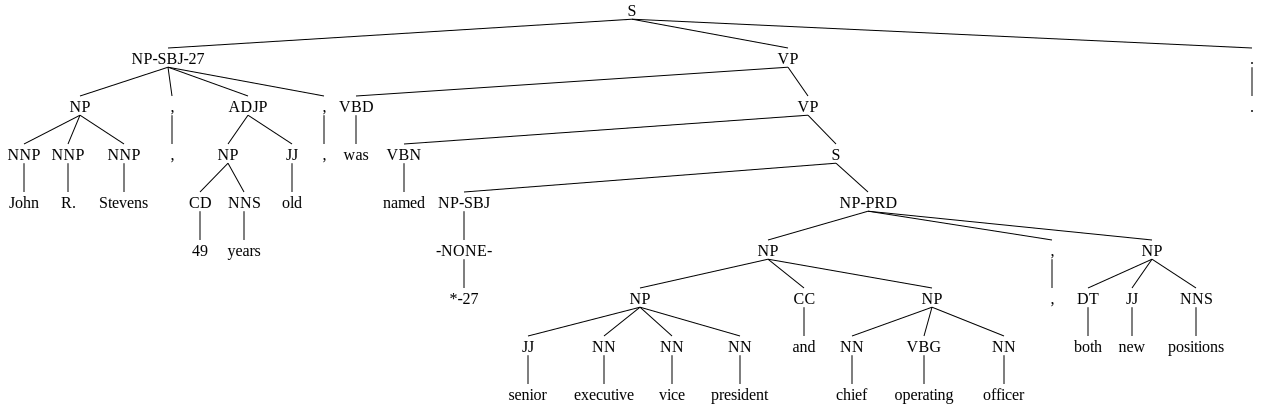

In [2]:
from nltk.tree import Tree
from reader import read_parsed_corpus

# 00/wsj_*.mrg にマッチするファイルから木を 1 つ取得する。
path, tree = next(read_parsed_corpus("treebank_3/parsed/mrg/wsj", [0]))
print(path)
tree

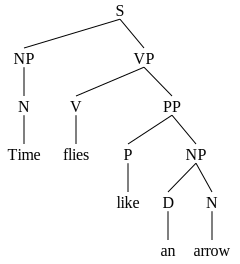

In [2]:
from nltk.tree import Tree
from pathlib import Path as p

tree: Tree = Tree.fromstring(p("tree.mrg").read_text())
tree

In [3]:
# tokenize 済みの文章が得られる。
# これが推論時の入力になる。
print(tree.leaves())

['Time', 'flies', 'like', 'an', 'arrow']


In [4]:
# 完全二分木の句構造ルールが取れる。
# この頻度が推論時のパラメータになる。
tree.chomsky_normal_form()
rules = tree.productions()
rules[:5]

[S -> NP VP, NP -> N, N -> 'Time', VP -> V PP, V -> 'flies']

In [14]:
from pprint import pprint

syntax_rules = {}
lexical_rules = {}
lexical_counts = {}

for rule in rules:
    if rule.is_lexical():
        word, *_ = rule.rhs()
        assert len(_) == 0
        lexical_rules.setdefault(word, set())
        lexical_rules[word].add(rule.lhs().symbol())  # 和集合
    else:
        children = tuple(map(str, rule.rhs()))
        syntax_rules.setdefault(children, set())
        syntax_rules[children].add(rule.lhs().symbol())

pprint(syntax_rules)
pprint(lexical_rules)

# 子ノードが 1 つのときは要検討

{('D', 'N'): {'NP'},
 ('N',): {'NP'},
 ('NP', 'VP'): {'S'},
 ('P', 'NP'): {'PP'},
 ('V', 'PP'): {'VP'}}
{'Time': {'N'}, 'an': {'D'}, 'arrow': {'N'}, 'flies': {'V'}, 'like': {'P'}}


In [15]:
# 完全二分木を treebank の木構造に戻す
tree.un_chomsky_normal_form()
tree.productions()[:5]

[S -> NP-SBJ-27 VP .,
 NP-SBJ-27 -> NP , ADJP ,,
 NP -> NNP NNP NNP,
 NNP -> 'John',
 NNP -> 'R.']

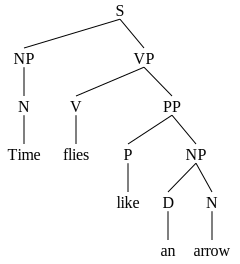

In [19]:
from pathlib import Path as p

sample = Tree.fromstring(p("sample.mrg").read_text())
sample

In [20]:
sample.leaves()

['Time', 'flies', 'like', 'an', 'arrow']

In [22]:
type(sample.productions()[0])

nltk.grammar.Production

In [23]:
sample.productions()[0]

S -> NP VP

In [25]:
from nltk.grammar import Production

TypeError: 'Production' object is not iterable